# PIC 16A Mini-Project

## § Group Contributions Statement
---------------------
Erick Villalta oversaw the data cleaning, creating figures and code for exploratory analysis, and plotting. The preliminary figures showcasing the relationships between variables were under his direction. Erick also worked on the Random Forests model and on the decision region plot, data cleaning, correlation coefficient, and plotting functions.

Mateo Umaguing collated each members' models and rough pieces of code into a readable and digestable document. The figure titles, final revisions to code writing, formatting, and function debugging were led by him. Mateo also worked on the Nearest Neighbor classifier and on the final model comparison section.

Saksham Thakur wrote the explanations for model 2 (Nearest Neighbor Classification), model 3 (Support Vector Machines), and the final conclusion entailing the performance of each model. Saksham also worked on the Support Vector Machines model and 

## § Data Import and Cleaning

In [1]:
# standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
penguins = pd.read_csv("palmer_penguins.csv")

In [2]:
# for reproducibility 
np.random.seed(1111)

# split data before cleaning
train, test=train_test_split(penguins, test_size=0.2)

* Consider picking two quantitative data columns and the one qualitative data column from the penguins data frame
* In total there are 6 choose 2 ways to pick the quantitative data times 2 ways to pick a qualitative data column
    - 6_C_2 x 2 = 15 x 2 = 30 options to pick from
* let us consider these combinations and pick from a relation correlation coefficient to see how well the data sets match with one another

### Cleaning

In [3]:
def clean_up(data):
    """
    Cleans the penguin data frame by selecting the relevant columns,
    removing N/As and unknown values (i.e. "Sex" = '.'),
    shortening column names, and changing qualitative data to numeric data.
    """
    
    # select columns
    cols = ["Species",
            "Island",
            "Sex",
            "Culmen Length (mm)",
            "Culmen Depth (mm)", 
            "Flipper Length (mm)",
            "Body Mass (g)",
            "Delta 15 N (o/oo)",
            "Delta 13 C (o/oo)"]
    
    #drop rows in sex where sex='.'
    if (data.index == 336).any():
        data=data.drop([336])

    # select a subset of columns
    data = data[cols]

    # shorten name of the species
    data["Species"] = data["Species"].str.split().str.get(0)


    # shorten names of columns
    data["Length"]=data["Culmen Length (mm)"]
    data["Depth"]=data["Culmen Depth (mm)"]
    data["Flipper"]=data["Flipper Length (mm)"]
    data["Mass"]=data["Body Mass (g)"]
    data["Delta 15 N"]=data["Delta 15 N (o/oo)"]
    data["Delta 13 C"]=data["Delta 13 C (o/oo)"]


    data = data.drop(labels=["Culmen Depth (mm)",
                             "Culmen Length (mm)",
                             "Flipper Length (mm)",
                             "Body Mass (g)",
                             "Delta 15 N (o/oo)",
                             "Delta 13 C (o/oo)"],
                     axis=1)
    data=data.dropna()

    # change the island and sex to numeric data
    le = preprocessing.LabelEncoder()
    data['Sex']=le.fit_transform(data['Sex'])
    data['Island']=le.fit_transform(data['Island'])
    
    return data

In [4]:
train=clean_up(train)

In [5]:
test=clean_up(test)

<ipython-input-3-3df7b6de3551>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"] = data["Species"].str.split().str.get(0)
<ipython-input-3-3df7b6de3551>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Length"]=data["Culmen Length (mm)"]
<ipython-input-3-3df7b6de3551>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [6]:
data_cols=[
           "Length",
           "Depth", 
           "Flipper",
           "Mass",
           "Delta 15 N",
           "Delta 13 C"
            ]

## § Exploratory Analysis

Here, we examine the relationships between each quantitative variable by looking at the correlation coefficient between every combination of variables.

In [7]:
# possible combination of quantitative data columns 6_C_2=15
from itertools import combinations
def sub_cols(cols,r):
    """
    Function creates all the possible combinations of columns
    """
    return list(combinations(cols,r))

#define a subset
subset = sub_cols(data_cols,2)
subset = [[subset[i][j] for j in range(2)] for i in range(len(subset))]
subset

[['Length', 'Depth'],
 ['Length', 'Flipper'],
 ['Length', 'Mass'],
 ['Length', 'Delta 15 N'],
 ['Length', 'Delta 13 C'],
 ['Depth', 'Flipper'],
 ['Depth', 'Mass'],
 ['Depth', 'Delta 15 N'],
 ['Depth', 'Delta 13 C'],
 ['Flipper', 'Mass'],
 ['Flipper', 'Delta 15 N'],
 ['Flipper', 'Delta 13 C'],
 ['Mass', 'Delta 15 N'],
 ['Mass', 'Delta 13 C'],
 ['Delta 15 N', 'Delta 13 C']]

In [8]:
def coer_coef(penguins,subset):
    """
    Prints the coerrelation coefficient(p) for each species
    where the column under species is the row in the subset
    """
    for species in penguins['Species'].unique():
        peng_df=penguins[penguins['Species']==species]
        print(species)
        p_list=[]
        for i in range(len(subset)):
            p=np.corrcoef(peng_df[subset[i][0]],peng_df[subset[i][1]])
            p_list.append(np.round(p[0][1],2))
        print(p_list)

In [9]:
coer_coef(train,subset)

Chinstrap
[0.72, 0.58, 0.53, 0.25, 0.05, 0.58, 0.64, 0.08, 0.05, 0.65, 0.28, 0.06, -0.0, -0.12, -0.16]
Adelie
[0.4, 0.39, 0.55, 0.07, 0.0, 0.32, 0.57, 0.08, 0.21, 0.49, -0.09, -0.27, -0.05, 0.02, 0.54]
Gentoo
[0.66, 0.68, 0.66, 0.11, 0.08, 0.73, 0.74, 0.17, -0.02, 0.72, 0.26, -0.03, 0.11, 0.14, -0.54]


### Figure 1. Table of Correlation Coefficients Between Each Combination of Variables

In [10]:
train.groupby('Species')[data_cols].corr()

Length     Depth   Flipper      Mass  Delta 15 N  \
Species                                                                    
Adelie    Length      1.000000  0.403068  0.388278  0.548537    0.071595   
          Depth       0.403068  1.000000  0.322802  0.574655    0.077547   
          Flipper     0.388278  0.322802  1.000000  0.486725   -0.088437   
          Mass        0.548537  0.574655  0.486725  1.000000   -0.051992   
          Delta 15 N  0.071595  0.077547 -0.088437 -0.051992    1.000000   
          Delta 13 C  0.003461  0.206039 -0.272110  0.020047    0.535364   
Chinstrap Length      1.000000  0.722974  0.582789  0.525135    0.253086   
          Depth       0.722974  1.000000  0.576735  0.641655    0.083173   
          Flipper     0.582789  0.576735  1.000000  0.651362    0.282154   
          Mass        0.525135  0.641655  0.651362  1.000000   -0.004117   
          Delta 15 N  0.253086  0.083173  0.282154 -0.004117    1.000000   
          Delta 13 C  0.052925  0.046831  0.055925 -0.120719   -0.162818   
Gentoo    Length      1.000000  0.655475  0.683681  0.656217    0.111583   
          Depth       0.655475  1.000000  0.727619  0.741353    0.171752   
          Flipper     0.683681  0.727619  1.000000  0.724044    0.264523   
          Mass        0.656217  0.741353  0.724044  1.000000    0.112823   
          Delta 15 N  0.111583  0.171752  0.264523  0.112823    1.000000   
          Delta 13 C  0.076703 -0.024170 -0.031410  0.136322   -0.540783   

                      Delta 13 C  
Species                           
Adelie    Length        0.003461  
          Depth         0.206039  
          Flipper      -0.272110  
          Mass          0.020047  
          Delta 15 N    0.535364  
          Delta 13 C    1.000000  
Chinstrap Length        0.052925  
          Depth         0.046831  
          Flipper       0.055925  
          Mass         -0.120719  
          Delta 15 N   -0.162818  
          Delta 13 C    1.000000  
Gentoo    Length        0.076703  
          Depth        -0.024170  
          Flipper      -0.031410  
          Mass          0.136322  
          Delta 15 N   -0.540783  
          Delta 13 C    1.000000

* col 6= ['Depth', 'Mass'] contains the best p, while col 3=['Length', 'Mass'] is close behind

Now, we examine the relationships between both quantiative and qualitative variables through a few plots. Here are the plots describing the best relationships between different variables.

In [11]:
def plot_scatter(penguins,x_axis,y_axis,qualitative):
    """
    Function plots a scatterplot of quantitative value(x,y)
    while the qualitative is the column of the graph
    """
    fgrid=sns.relplot(data=penguins, x=x_axis,
            y=y_axis,
            hue="Species",
            sizes=(100,100),
            col=qualitative)

### Figure 2. Scatter Plot of Culmen Depth versus Mass Separated by Island and Species

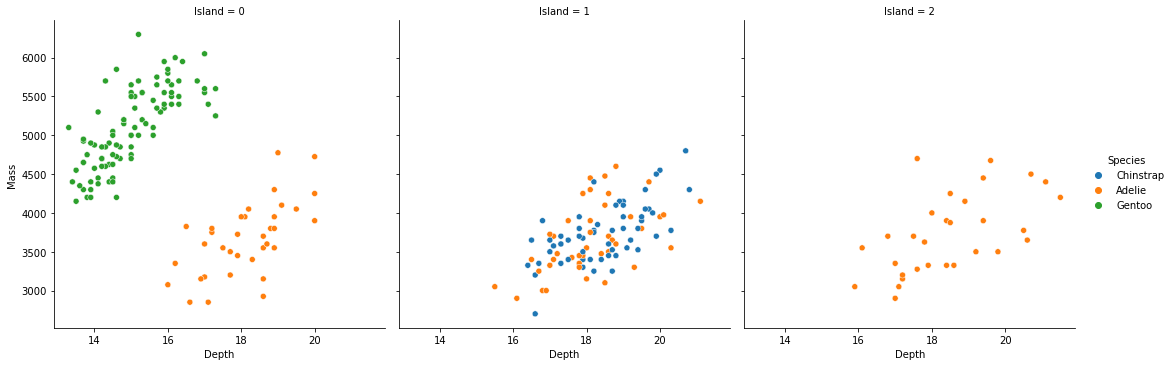

In [12]:
plot_scatter(train,x_axis="Depth",y_axis="Mass",qualitative="Island")

* These species scatters seem to overlap and would be harder to predict a given species despite the strong correlation
* The island=1 column still has an overlap between chinstrap and adelie. 
* Now, we will observe the next best p from col 2=[Length, Mass]

### Figure 3. Scatter Plot of Culmen Length versus Mass Separated by Sex and Species

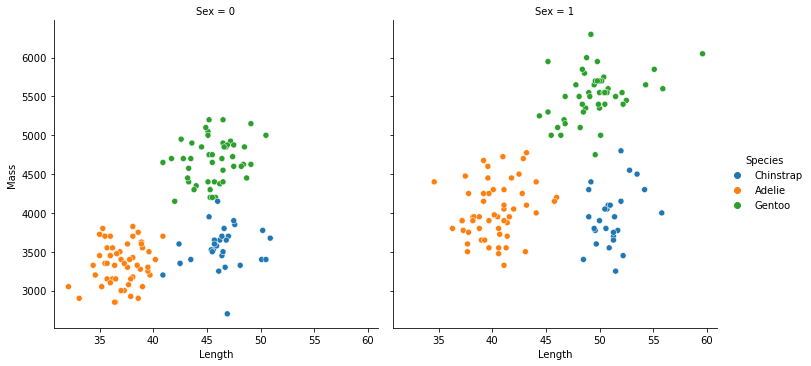

In [13]:
plot_scatter(train,x_axis="Length",y_axis="Mass",qualitative="Sex")

### Figure 4. Scatter Plot of Culmen Length versus Mass Separated by Island and Species

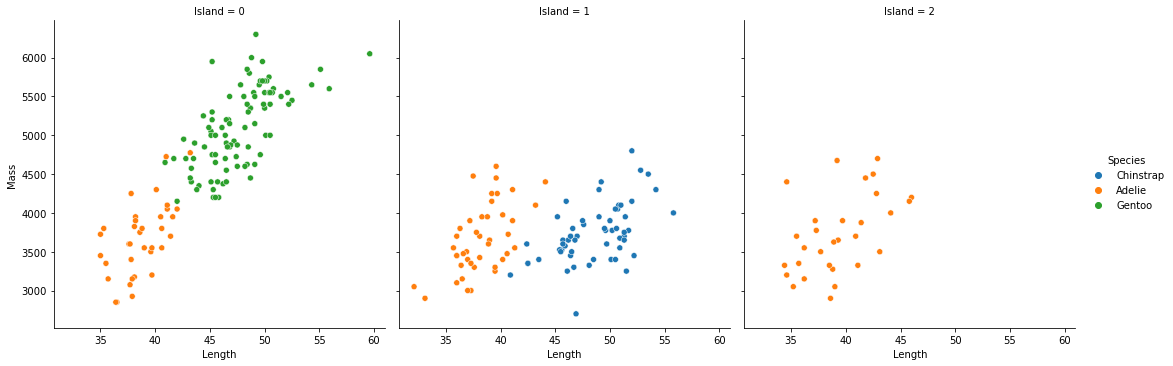

In [14]:
plot_scatter(train,x_axis="Length",y_axis="Mass",qualitative="Island")

* [Length,Mass] is more spread out and clustered than [Depth,Mass]
* Island as a qualitative feature seems preferrable due to Adelie being isolated

In [15]:
def plot_hist(penguins,subset_col,**kwargs):
    sns.displot( penguins,x=subset_col,col="Island", stat="density", hue="Species",**kwargs) 

### Figure 5. Histogram of Culmen Length Across Islands and Species

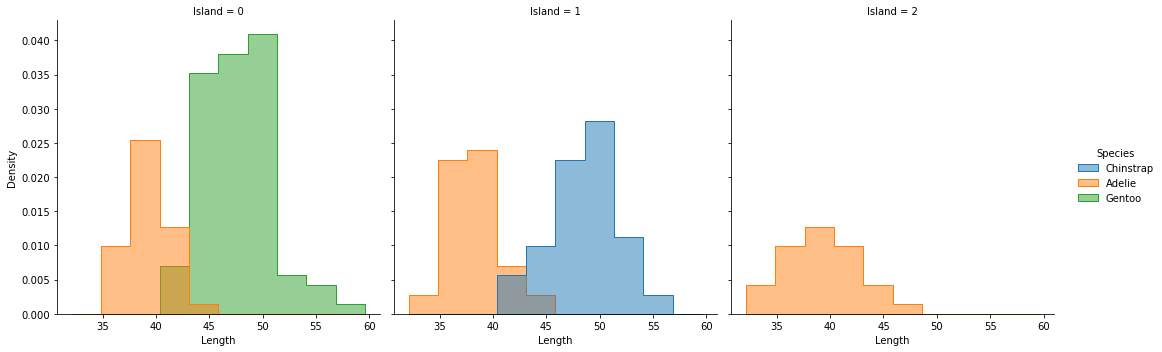

In [16]:
plot_hist(train,subset_col="Length",alpha=.5,element="step")

### Figure 6. Histogram of Mass Across Islands and Species

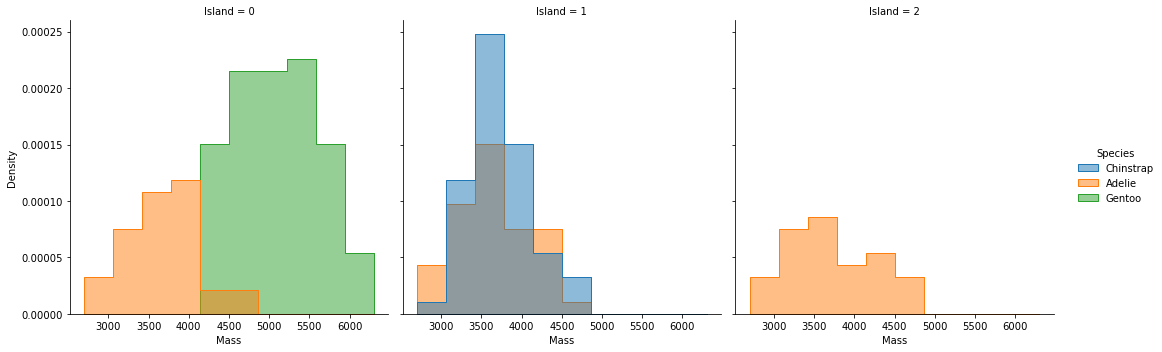

In [17]:
plot_hist(train,subset_col="Mass",alpha=.5,element="step")

* Both graphs of histograms  have a good distinction bewteen quantitative features, with the exception of Island 1 slightly overlapping. 

### Figure 7. Boxplot of Mass Across Islands and Species

<AxesSubplot:xlabel='Island', ylabel='Mass'>

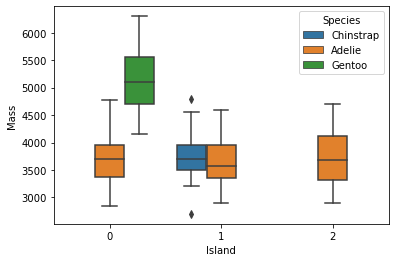

In [18]:
sns.boxplot(data=train,x='Island',y='Mass',hue='Species')

### Figure 8. Boxplot of Length Across Islands and Species

<AxesSubplot:xlabel='Island', ylabel='Length'>

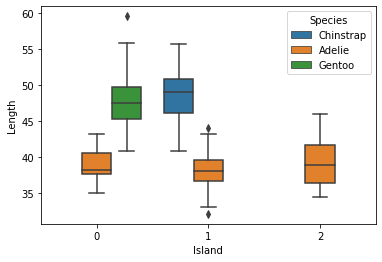

In [19]:
sns.boxplot(data=train,x='Island',y='Length',hue='Species')

### Figure 9. Descriptive Statistics of Length and Mass Grouped by Species and Island

In [20]:
train.groupby(["Species","Island"])[["Length","Mass"]].describe()

Length                                                   \
                  count       mean       std   min     25%    50%    75%   
Species   Island                                                           
Adelie    0        35.0  38.714286  2.132541  35.0  37.700  38.20  40.55   
          1        42.0  38.245238  2.361087  32.1  36.675  38.10  39.60   
          2        30.0  39.300000  3.326591  34.4  36.450  38.95  41.70   
Chinstrap 1        57.0  48.549123  3.190674  40.9  46.200  49.00  50.90   
Gentoo    0        94.0  47.648936  3.172013  40.9  45.350  47.50  49.75   

                        Mass                                                   \
                   max count         mean         std     min     25%     50%   
Species   Island                                                                
Adelie    0       43.2  35.0  3666.428571  469.039336  2850.0  3375.0  3700.0   
          1       44.1  42.0  3666.071429  444.643644  2900.0  3362.5  3575.0   
          2       46.0  30.0  3731.666667  506.761750  2900.0  3325.0  3675.0   
Chinstrap 1       55.8  57.0  3736.842105  378.203733  2700.0  3500.0  3700.0   
Gentoo    0       59.6  94.0  5103.191489  514.614822  4150.0  4700.0  5100.0   

                                  
                     75%     max  
Species   Island                  
Adelie    0       3950.0  4775.0  
          1       3950.0  4600.0  
          2       4112.5  4700.0  
Chinstrap 1       3950.0  4800.0  
Gentoo    0       5550.0  6300.0

* As seen by the graphs and data, Island seems to best isolate the penguin species based on Culmen Length and Body Mass

## § Machine Learning Modeling

In [21]:
def prep_penguin_data(data,qual_col,quant_col):
    """
    Training the x and y sets to the picked featured cols
    """
    
    df=data.copy()
    le = preprocessing.LabelEncoder()
    df['Species']=le.fit_transform(df['Species'])
    qual_col.extend(quant_col)
    X= df[qual_col]
    y=df['Species']
    y=np.array(y)
    return (X,y)

In [22]:
X_train, y_train = prep_penguin_data(data=train,qual_col=['Island'], quant_col=['Length','Mass'])
X_test, y_test = prep_penguin_data(data=test, qual_col=['Island'],quant_col=['Length','Mass'] )

In [92]:
#from sklearn.metrics import make_scorer, accuracy_score,precision_score
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

# model Select
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

### Decision Region Plot Function

In [24]:
penguins=clean_up(penguins)
X, y = prep_penguin_data(data=penguins,qual_col=['Island'],quant_col=['Length','Mass'])
island_num=[0,1,2]

In [69]:
import matplotlib.patches as mpatches
import matplotlib.colors
def plot_regions(c, X, y,island_num):
    """
    TODO: replace docstring
    """
    c.fit(X,y)
    #create plot
    fig, ax = plt.subplots(1, len(island_num), figsize = (15, 3), sharey = True)
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Length']
    x1 = X['Mass']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    
    colors={
        'Adelie':'blue',
        'Chinstrap':'green',
        'Gentoo':'red'
    }
    #my color map
    my_map= matplotlib.colors.ListedColormap(colors =
                                             ['blue','green','red'])
    for i in island_num:
        # creates an array of island number
        ZZ = np.ones(XX.shape).astype('int32') * i
        #creates a mask of X corresponding to island #
        mask= X['Island'] == i
        #predict with island number as a concatenation to XX,YY
        p = c.predict(np.c_[ZZ,XX,YY])
        p = p.reshape(xx.shape)
    
    
        # use contour plot to visualize the predictions
        ax[i].contourf(xx, yy, p, cmap = my_map, alpha = 0.2, vmin = 0, vmax = 2)
    
        # plot the data
        ax[i].scatter(x0[mask],
                      x1[mask],
                      c = y[mask],
                      cmap = my_map,
                      vmin = 0,
                      vmax = 2)
    
        ax[i].set(xlabel = "Culmen Length (mm)", 
                  title='Island = '+str(i))
        
        mask= X['Island'] == 0
        ax[0].scatter(x0[mask],
                     x1[mask],
                     c= y[mask],
                     cmap= my_map)
        ax[0].set(ylabel= 'Body Mass (g)')
        patches=[mpatches.Patch(color=colors[key],label=key) for key in colors]
        fig.legend(handles=patches,bbox_to_anchor=(1.15,.6))

## Model 1. Random Forest

### Cross-Validation

In [26]:
# parameter selection

# number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start=10,stop=80,num=10)]

# number of features to consider at every split
max_features = ['auto','sqrt']

# maximum number of levels in a tree
max_depth = [2,4]

# min number of samples required to split a node
min_samples_split = [2,4]

# min number of samples required at each leaf node
min_samples_leaf = [1,2]

# method of Selecting samples for training each tree
bootstrap = [ True, False]

In [27]:
# create the param grid
param_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [28]:
rf_Model= RandomForestClassifier()
rf_Grid = GridSearchCV( estimator= rf_Model,
                        param_grid = param_grid,
                        cv=4, 
                        verbose=2,
                        n_jobs=4)

In [29]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
rf_Grid.fit(X_train,y_train)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [31]:
# best parameters CV
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 17}

In [32]:
print(f'Train Accuracy : {rf_Grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy : 0.984
Test Accuracy : 0.924


In [33]:
print(f'Train Accuracy : {rf_Model.score(X_train,y_train):.3f}')
print(f'Test Accuracy : {rf_Model.score(X_test,y_test):.3f}')

Train Accuracy : 1.000
Test Accuracy : 0.939


In [34]:
cross_val_score(rf_Grid,X_train,y_train, cv=5).mean()

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits


0.94947209653092

* Note that the rf_Model(basic model) overfits the data to 100% accuracy, rf_Grid chooses the best parameters to get a balanced train and test accuracy, something more realistic

### Evaluation

In [35]:
def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n",cm)

In [36]:
conf_matrix(model=rf_Grid)

Confusion matrix:
 [[28  2  2]
 [ 0 10  0]
 [ 1  0 23]]


* Observation:
    - consider the 3x3 of col and row corresponding to 0,1,2 species. So row 0= species 0.
    - The columns are then the actual species and rows are the predicted
    - The main diagonals give the correct predictions to the actual specie.
* Species 0: Adelie
    - For the Adelie penguin, two were incorrectly predicted to be Gentoo and another two were incorrectly predicted to be Chinstrap. The scatter plots above show that Adelie penguins with lower Culmen Length and Body Mass overlap with other species.
* Species 1: Chinstrap
    - One Chinstrap was predicted to be an Adelie.
* Species 2: Gentoo
    - One Gentoo was predicted to be an Adelie.
* It is important to note that in the previously shown scatter plot distributions, Adelie penguins are in the lower perentiles for the other species in Island 0 and Island 1.

### Figure 10. Decision Regions for Random Forest Classifier

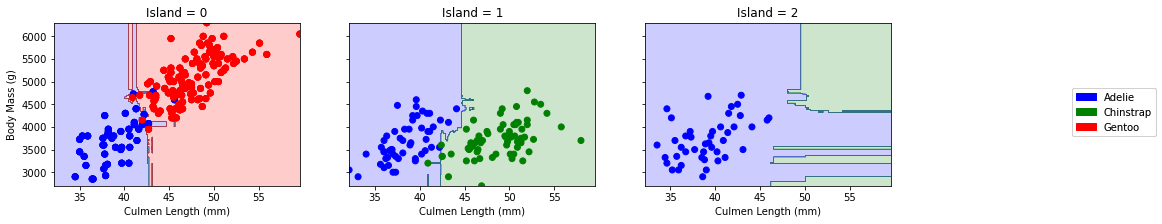

In [70]:
plot_regions(c=RandomForestClassifier(), X=X, y=y,island_num=island_num)

### Discussion
-------------
As seen by the decision region and score for the rf_model(with untuned parameters), the model tends to overfit the data. Let us consider how a decision tree trains data. It splits the data set recursively using the decision nodes- unless it is left with pure leaf nodes- then finds the best split by maximizing the gain on the data sample. Now a random forest is a collection of multiple random decision trees,with randomly selected rows from the data (bootstrap) and chooses a random subset of features(random feature selection) to train on. The aggregation is then a random point passed through all decision trees and takes the majority answer as the prediction. Now that the process has been shortly explained let us consider the benefit of a random forest and why our feature columns can explain some overfitting. Bootstrapping ensures we are not using the same data for every tree so our model is not highly sensitive to the training data (lower variance). The random feature selection then reduces the correlation between the trees, but since our model consists only of 3 features) we might have trees with similar/same decision nodes, making the trees act very similar to one another. The random feature selection can also mean some trees have less effective subset pairing, consider the histogram mass with islands, where island 1 has a big overlap in this case the model could fail. 

## Model 2. Nearest-Neighbor Classification

### Cross-Validation

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8484848484848485


In [38]:
k_range = np.arange(1,11)
k_scores = np.zeros(10)

best_score = 0.0
best_k = -np.inf

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    k_scores[i - 1] = score
    
    if score > best_score:
        best_score = score
        best_k = i

print("Best k-value: " + str(best_k))
print("Best score: " + str(best_score))

Best k-value: 1
Best score: 0.8253393665158371


In [90]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.803030303030303)

### Figure 11. k-value Scores versus Cross-Validation Score

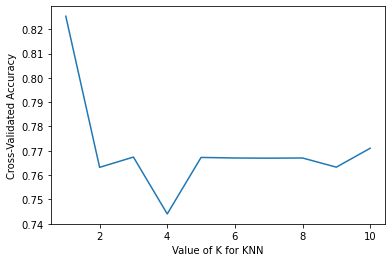

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Evaluation

In [91]:
conf_matrix(model=knn)

Confusion matrix:
 [[27  0  5]
 [ 2  7  1]
 [ 3  2 19]]


* Species 0: Adelie
    - 5 Adelies were predicted to be Gentoos.
* Species 1: Chinstrap
    - 2 Chinstraps were predicted to be Adelies and 1 was predicted to be Gentoo.
* Species 2: Gentoo
    - 3 Gentoos were predicted to be Adelies and 2 were predicted to be Chinstraps.

### Figure 12. Decision Regions for K-Nearest Neighbor Classifier

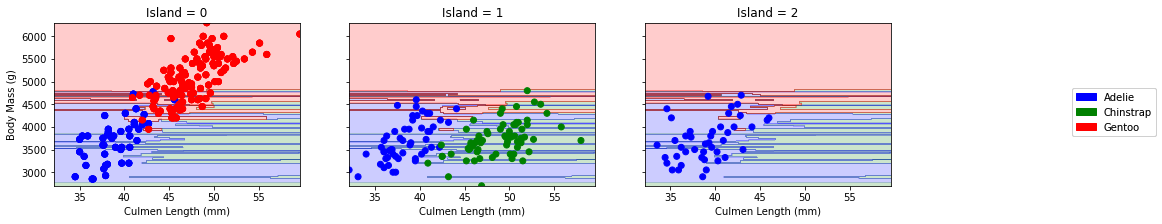

In [88]:
plot_regions(c=KNeighborsClassifier(n_neighbors=1), X=X, y=y,island_num=island_num)

### Discussion

*Discuss KNN perforamnce*

## Model 3: Support Vector Machines

In [82]:
SVM_Model = SVC(kernel='linear')
SVM_Model.fit(X_train,y_train)

y_pred = SVM_Model.predict(X_test)

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


### Cross Validation

In [78]:
cross_val_score(SVM_Model, X, y, cv=5).mean()

0.959951923076923

### Evaluation

In [56]:
confusion_matrix(y_test, y_pred)

array([[27,  1,  4],
       [ 0, 10,  0],
       [ 1,  0, 23]], dtype=int64)

* Species 0: Adelie
    - 1 Adelies were predicted to be Chinstraps and 4 were predicted to be Gentoos.
* Species 1: Chinstrap
    - All Chinstraps were correctly predicted.
* Species 2: Gentoo
    - 1 Gentoos was predicted to be Adelie.

In [86]:
print(recall_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))

[0.84375    1.         0.95833333]
[0.96428571 0.90909091 0.85185185]


### Figure 13. Decision Regions for Support Vector Machine Classifier

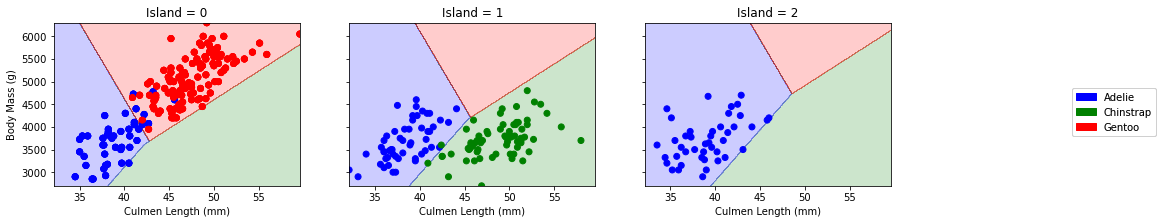

In [87]:
plot_regions(c=SVC(kernel='linear'), X=X, y=y,island_num=island_num)

### Discussion

*Discuss SVM performance*

## § Overall Model Predictive Power Based on Cross Validation

In [94]:
rfgrid_cv = cross_val_score(rf_Grid, X_train, y_train, cv = 5 ).mean()
knn_cv = cross_val_score(knn, X_train, y_train, cv = 5).mean()
svm_cv = cross_val_score(SVM_Model, X, y, cv=5).mean()

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Fitting 4 folds for each of 320 candidates, totalling 1280 fits


In [95]:
cv_df = pd.DataFrame(data={"name":["Random Forests", "Nearest-Neighbors", "Support Vector Machines"],
                     "cv_scores":[rfgrid_cv, knn_cv, svm_cv]})

### Figure 14. Predictive Skill (Cross Validation Score) of Different Models

<AxesSubplot:xlabel='name', ylabel='cv_scores'>

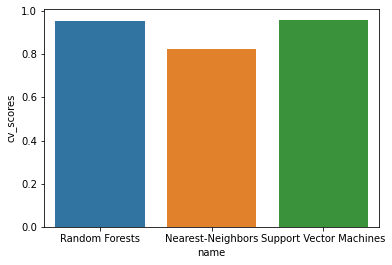

In [96]:
sns.barplot(x = "name", y = "cv_scores", data = cv_df)

*Final paragraph*